### Network and Graph Theory Guide CDS
#### Cornell Data Science
##### Author: Christopher Elliott

#### Installation Guide
Before starting the guide: the lastest release of Anaconda should install all of the modules used in this guide **except** Basemap and Community.You **MUST** install Basemap and Community to use many parts of this guide. If either packages are not installed, some modules will **NOT** work. to install Basemap and community, run "pip install -c conda-forge basemap=1.0.8.dev0" and "pip install python-louvain" in your terminal or command prompt. Feel free to look at the documentation for both modules at https://matplotlib.org/basemap

In [117]:
# Import Modules
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import community
from mpl_toolkits.basemap import Basemap as Basemap

#### Creating graphs using networkx

Graphs can be created in a number of ways using Networkx. They can be created by simply adding edges between nodes or by reading information from a data structure such as an adjacency matrix or txt file. Similarly, graphs can be converted into various data structures for exportation.

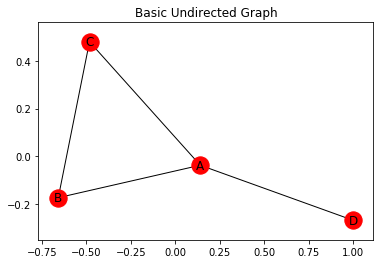

In [325]:
# Creating an undirected graph

# Create a networkx graph object
G = nx.Graph()

#add edges
G.add_edges_from([('A','B'),('B','C'),('C','A'), ('D','A')])

#Draw the graph
nx.draw_networkx(G)
plt.title("Basic Undirected Graph")
plt.show()

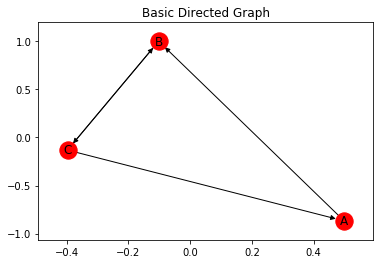

In [119]:
#Creating a directed graph

#initalize a directed graph object
G = nx.DiGraph()

#add edges to the graph
G.add_edges_from([('A','B'),('B','C'),('C','A'), ('C','B')])

#Draw the graph
nx.draw_networkx(G)
plt.title("Basic Directed Graph")
plt.show()

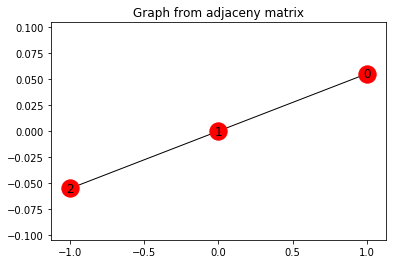

In [120]:
# Creating a graph using an adjaceny matrix

#Initilize a matrix
matrix = np.array([[0,1,0],
                   [1,0,1],
                   [0,0,1]])

#Parse the matrix in networkx's graph generator
G = nx.from_numpy_matrix(matrix)
nx.draw_networkx(G)
plt.title("Graph from adjaceny matrix")
plt.show()

In [327]:
# Converting a graph to an adjacency matrix
G = nx.DiGraph()
G.add_edges_from([('A','B'),('B','C'),('C','A'), ('C','B')])

#intialize a matrix by parsing the Graph object in a 
matrix = nx.to_numpy_matrix(G)

print(matrix)

[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  1.  0.]]


#### Preforming Breadth and Depth first search using networkx 

Breadth first and Depth first search are diffrent types of tree searching algorithms. They are often used to describe the structure of a graph. Networkx has functions within the package which will automatiaclly generate breadth first and depth first search graph.

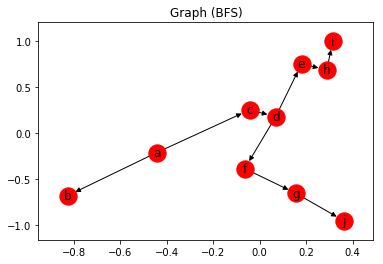

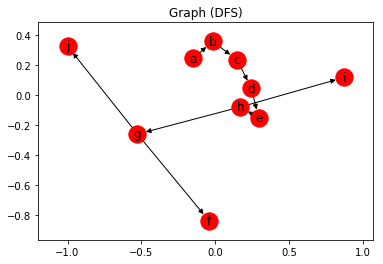

In [328]:
#Graph
G = nx.Graph()
G.add_edges_from(
    [('a', 'b'), ('a', 'c'), ('b', 'c'), ('c','d'), ('d','e'), ('e','h'), ('h', 'i'), 
     ('d','f'), ('f','g'), ('g','j'), ('e','f'), ('g','h')])

#Breadth First Search
bfs = nx.bfs_tree(G,'a')

#Draw BFS graph
nx.draw_networkx(bfs)
plt.title("Graph (BFS)")
plt.show()

#Depth First Search
dfs = nx.dfs_tree(G,'a')
nx.draw_networkx(dfs)
#Draw DFS graph
plt.title("Graph (DFS)")
plt.show()

### Visualizing an Ego Network using networkx 

An Ego Network is a visual representation of all the edges between a single node and its neighbors. An ego network also draws the edges between neighbors which are mutual neighbors with each other. In this guide, the dataset used consists of 'cliques' (or 'friends lists') from Facebook. The data was collected from survey participants using an app. This dataset was provided by McAuley and Leskovec's "Learning to Discover Social Circles in Ego Networks" NIPS, 2012. More information about this dataset can be found at http://snap.stanford.edu/data/ego-Facebook.html

In [123]:
# Generate a Graph using the dataset 
G = nx.read_edgelist('facebook_combined.txt', create_using= nx.Graph(), nodetype= int)

# Use a spring layout to space the nodes out 
pos_G = nx.spring_layout(G)

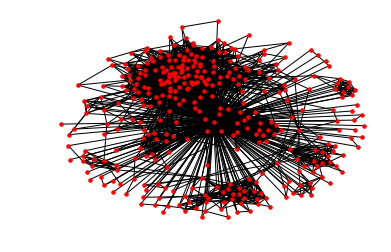

In [124]:
# Generate an ego graph by parsing a networkx graph as a networkx graph 
G_ego = nx.ego_graph(G,0)

# Spread nodes out such that an ego graph can be generated
pos_G = nx.spring_layout(G_ego)

# Draw the graph
plt.axis('off')
nx.draw_networkx(G_ego, pos= pos_G, with_labels= False, node_size= 12)

In the Graph above, an ego network was generated using networkx's ego network function. While it is possible to see various cliques in the network structure, a more quantative approach enables us to determine what friends fall into which cliques. The module Community allows for us to use the louvain method to quantify which nodes belong to which cliques. The value generated from this graph can the be used to color code each clique in the graph thus giving us better insight to the network structure. 

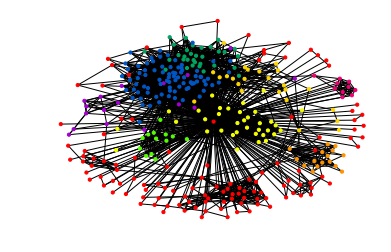

In [131]:
# Partition the graph into various cliques
parts = community.best_partition(G_ego)

# Create a set of values for the cliques in the graph which corresponds to the number of common edges or "friends"
values = [parts.get(node) for node in G_ego.nodes()]

# Draw the graph and color the nodes by their clique "value"
plt.axis("off")
nx.draw_networkx(G_ego, pos = pos_G, cmap = plt.get_cmap("prism"), 
                 node_color = values, node_size = 10, with_labels = False)

### Plotting points on a map using basemap

Along with mapping edges between points, mapping points on a geographic map can help analysts look for trends within data. In this guide, the social media platform Gowalla is used to map where users are located. Gowalla does this by using a location-based social networking website where users share their locations by checking-in. The dataset was created by Cho, Myers and Leskovec's Friendship and Mobility: Friendship and Mobility: User Movement in Location-Based Social Networks ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD), 2011. More information can be found here: https://snap.stanford.edu/data/loc-gowalla.html

In [333]:
# Import data into pandas dataframe
df = pd.read_table("Gowalla_totalCheckins.txt",header= None)

# Add headings for the columns
df.columns = ["user", "check-in time","lat","long","location id"]

df.head()

,user,check-in time,lat,long,location id
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878


C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


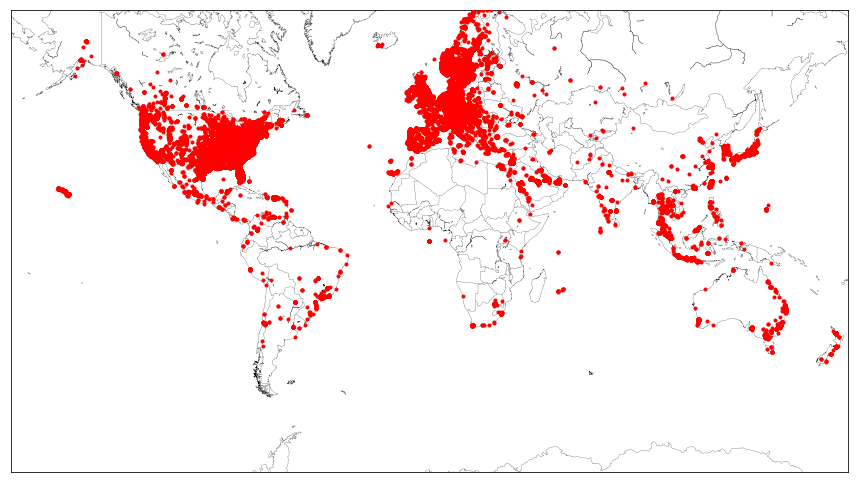

In [330]:
# Set figure size large enough to make the graph readable
plt.figure(figsize=(15,9))

# Create a map of the world with countries and coastlines 
m = Basemap(projection='merc',llcrnrlon=-180, llcrnrlat=-70, urcrnrlon=180, urcrnrlat=70,lat_ts=0,resolution='l',suppress_ticks=True)
m.drawcountries(linewidth = .2)
m.drawcoastlines(linewidth=.2)

# Drop duplicate users in the dataframe (we do this so that the graph will generate within a reasonable amount of time)
df = df.drop_duplicates('user')

# Extract latitude and longitude values
lat = df['lat'].values
lon = df['long'].values

# Convert lat and long values to basemap cordinantes
lats, long = m(lon, lat)

# Create a scatter graph with markers placed on log-on locations on the map
m.scatter(lats, long, marker = '.', color='r', zorder=5);